In [26]:
import tensorflow as tf
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict

def get_metrics(base_dir):
    for name in os.listdir(base_dir):
        if 'events.out' in name:
            p = os.path.join(base_dir, name)
            metrics = defaultdict(list)
            for summary in summary_iterator(p):
                for value in summary.summary.value:
                    if value.tag != "image":
                        metrics[value.tag].append(tf.io.decode_raw(value.tensor.tensor_content, value.tensor.dtype)[0].numpy())
            return metrics

In [27]:
METRICS = {}

for rho, base_dir in [(0., '/Users/dbahri/simclr/tf2/output_dir/v1_rho0'),
                  (0.05, '/Users/dbahri/simclr/tf2/output_dir/v1_rho05'),
                  (1., '/Users/dbahri/simclr/tf2/output_dir/v1_rho1'),
                  (2., '/Users/dbahri/simclr/tf2/output_dir/v1_rho2')
                 ]:
    METRICS[rho] = get_metrics(base_dir)

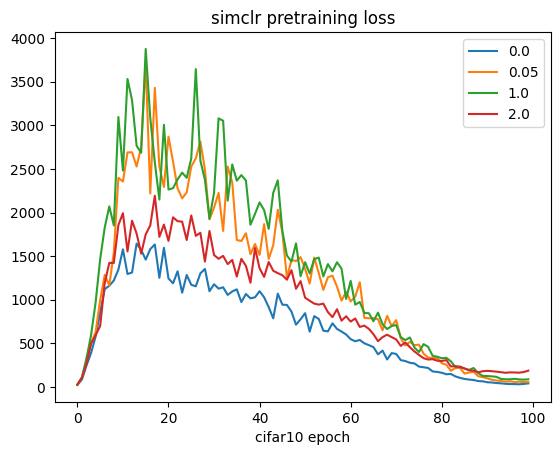

In [43]:
import numpy as np
from matplotlib import pyplot as plt

for rho in [0., 0.05, 1., 2.]:
    x = np.array(METRICS[rho]['train/sam_loss'])
    plt.plot(x, label=str(rho))
plt.title('simclr pretraining loss')
plt.xlabel('cifar10 epoch')
plt.legend()
plt.show()

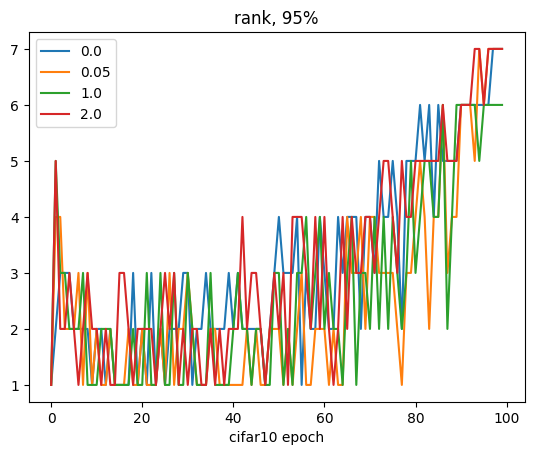

In [57]:
for rho in [0., 0.05, 1., 2.]:
    x = np.array(METRICS[rho]['n_components_95'])
    plt.plot(x, label=str(rho))
plt.title('rank, 95%')
plt.xlabel('cifar10 epoch')
plt.legend()
plt.show()


In [46]:
METRICS

{0.0: defaultdict(list,
             {'n_components_95': [1.0,
               2.0,
               3.0,
               3.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               1.0,
               2.0,
               2.0,
               1.0,
               2.0,
               1.0,
               1.0,
               1.0,
               1.0,
               3.0,
               1.0,
               2.0,
               1.0,
               3.0,
               1.0,
               2.0,
               1.0,
               2.0,
               2.0,
               2.0,
               3.0,
               3.0,
               1.0,
               2.0,
               2.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               3.0,
               2.0,
               3.0,
               2.0,
               2.0,
               2.0,
               2.0,
               2.0,
               1.